# Tarea 9  
### Elmer Humberto Lémus Flores

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

## Ejercicio 1

1. Generar arreglos de numpy para obtener el resultado de $ z = f(x,y) $ para un conjunto de entrada aleatorio de al menos 100 filas.

In [2]:
# Creamos la función
def f(x,y):
    return x**2 + y*3 + 15

# Cantidad de valores para cada variable
fila = 250

# Ingresamos valores aleatorios para X y Y
x = np.random.randint(1,50,fila)
y = np.random.randint(1,50,fila)

# Evaluamos la función
z = f(x,y)

- Crear un `DataFrame` de pandas con las columnas $x$, $y$ y $z$.

In [3]:
# Panda
df = pd.DataFrame({ 'Variable_x': x, 'Variable_y': y, 'Variable_z': z })
df

,Variable_x,Variable_y,Variable_z
0,18,8,363
1,38,10,1489
2,4,49,178
3,18,38,453
4,8,30,169
...,...,...,...
245,3,43,153
246,41,33,1795
247,30,17,966
248,26,42,817


- Obtener el promedio de cada `Series` en el `DataFrame`.

In [4]:
# Sacamos el promedio de los valores de las variables
df.mean()

Variable_x     23.560
Variable_y     25.468
Variable_z    827.268
dtype: float64

## Ejercicio 1.1

De forma similar al ejercicio anterior, genere un `DataFrame` con los resultados de una función $y = f(x)$ con al menos 100 filas.

In [5]:
# Creamos la función
def f2(x):
    return x**2 + x*3 + 15

# Ingresamos valores aleatorios para X y Y
x2 = np.arange(300)
y2 = f2(x2)

Grafique los resultados con `matplotlib` utilizando 2 variantes:  
a. Utilizando los arreglos de numpy (objetos `ndarray`) que utilizó para generar el `DataFrame`.

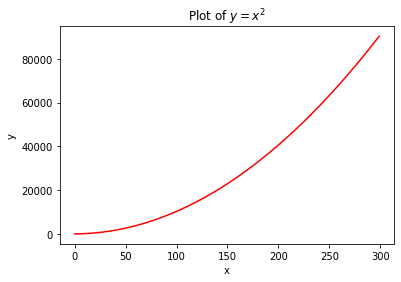

In [6]:
# Tamaño de la figura
plt.figure(figsize=(6, 4))

# Valores y color
plt.plot(x2, y2, 'r')

# Rotulos
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Plot of $y=x^2$")
plt.show()

b. Utilizando los objetos `Series` del `DataFrame`.

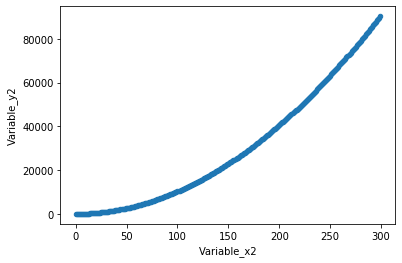

In [7]:
df2 = pd.DataFrame({ 'Variable_x2': x2, 'Variable_y2': y2 })
graph = df2.plot.scatter( x = 'Variable_x2', y = 'Variable_y2')

- Obtenga el objeto *handler* de la gráfica y guarde la gráfica en PDF.

In [8]:
graph.get_figure().savefig('graph.pdf')

- Asegúrese de entender la diferencia entre generar la gráfica para guardarla (sin mostrarla) y generar la gráfica para mostrarla.

Con **handler** guardamos la gráfica como un objeto, que no necesariamente vamos a mostrar. Para guardar y mostrar la gráfica utilizamos **savefig**.

## Ejercicio 2

Prueba 5 funciones de la primera página del *cheat sheet* no vistas en la exposición.

In [9]:
# Tomando el df del problema 1
df

,Variable_x,Variable_y,Variable_z
0,18,8,363
1,38,10,1489
2,4,49,178
3,18,38,453
4,8,30,169
...,...,...,...
245,3,43,153
246,41,33,1795
247,30,17,966
248,26,42,817


In [10]:
# 1
# Tomamos una muestra del 25% de los datos
muestra = df.sample(frac=0.25)
muestra

,Variable_x,Variable_y,Variable_z
215,35,2,1246
205,33,11,1137
243,20,47,556
4,8,30,169
49,16,22,337
...,...,...,...
42,25,40,760
208,37,5,1399
88,49,11,2449
37,45,13,2079


In [11]:
# 2
# Eliminamos duplicados
# Remove duplicate rows (onlyconsiders columns).
sin_duplicados = df.drop_duplicates()
sin_duplicados

,Variable_x,Variable_y,Variable_z
0,18,8,363
1,38,10,1489
2,4,49,178
3,18,38,453
4,8,30,169
...,...,...,...
244,15,14,282
246,41,33,1795
247,30,17,966
248,26,42,817


In [12]:
# 3
# Seleccionamos los últimos valores de la tabla
sin_duplicados.tail(5)

,Variable_x,Variable_y,Variable_z
244,15,14,282
246,41,33,1795
247,30,17,966
248,26,42,817
249,32,32,1135


In [13]:
# 4
# Select and order top n entries.
df.nlargest(5,"Variable_z")

,Variable_x,Variable_y,Variable_z
118,48,49,2466
164,48,44,2451
88,49,11,2449
90,48,18,2373
143,48,18,2373


In [14]:
# 5
# Selecciona y ordena los últimos n valores de la columna deseada.
df.nsmallest(5, "Variable_z")

,Variable_x,Variable_y,Variable_z
178,2,2,25
28,2,6,37
191,2,7,40
119,4,6,49
158,2,10,49


## Ejercicio 3

Resuelva las siguientes preguntas utilizando las funciones de pandas. Ayúdese con la hoja de trucos.

In [15]:
# Se importa la base de datos del titanic
df_titanic = pd.read_csv("titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 - ¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?

In [16]:
# La tarifa máxima que se pago:
df_titanic['Fare'].max()

512.3292

In [17]:
# La mediana es:
df_titanic['Fare'].median()

14.4542

- Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna `Survived` indica si alguien sobrevivió (1) o no (0)).

In [18]:
# La tasa de supervivencia promedio de todos los pasajeros es:
df_titanic['Survived'].mean()

0.3838383838383838

- Haga una gráfica de la distribución de edades de los pasajeros del Titanic

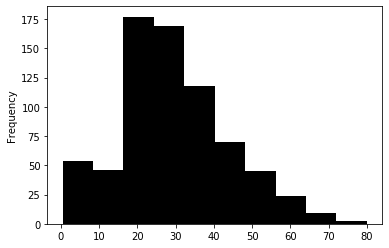

In [19]:
# Utilizando un histograma
df_titanic['Age'].plot.hist(color = 'black')

- Según el conjunto de datos del Titanic, seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo para las pasajeras.

In [20]:
# Para los hombres
df_titanic2 = df_titanic.set_index('Sex')
age = df_titanic2['Age']
age['male'].mean()

30.72664459161148

In [21]:
# Para mujeres
age['female'].mean()

27.915708812260537

- Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 estaban en el Titanic?

In [22]:
# Pasajeros mayores de 70 años
age = df_titanic['Age']
age[age > 70].count()

5

- Calcula la edad promedio para cada sexo. Ahora utiliza el método `groupby`.

In [23]:
# Media por sexo
# Utilizando grupo, luego solo la columna de edad
df_titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- Calcule esta relación de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana).

In [24]:
filtro = df_titanic[['Age', 'Survived','Sex']]
filtro2 = filtro[filtro['Age'] < 25]
filtro2.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.726496
male,0.204969


In [25]:
# Para toda la población menor de 25, sin importar el sexo
filtro2['Survived'].mean()

0.4244604316546763

- ¿Cuál es la diferencia en la proporción de supervivencia entre sexos?

In [26]:
df_titanic2 = df_titanic.set_index('Sex')
sobre = df_titanic2['Survived']

# Proporción de hombres
prop_h = sobre['male'].mean()
print("Proporción de hombres: ",prop_h)

# Proporción de mujeres
prop_m = sobre['female'].mean()
print("Proporción de mujeres: ",prop_m)

# Diferencia de proporciones
dif_pro = prop_m-prop_h
print("Diferencia de proporciones: ",dif_pro)

Proporción de hombres:  0.18890814558058924
Proporción de mujeres:  0.7420382165605095
Diferencia de proporciones:  0.5531300709799203


In [27]:
df_titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


- ¿O cómo difiere la proporción de sobrevivientes entre las diferentes clases de pasajeros? Haz una gráfica de barras visualizando la relación de supervivencia para las 3 clases.

In [28]:
clase = df_titanic.groupby('Pclass')[['Survived']].mean()
clase

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


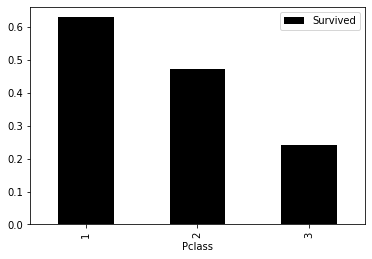

In [29]:
clase.plot(kind='bar', color = 'black')

#### Haga una gráfica de barras para visualizar la tarifa promedio pagada por los pasajeros de acuerdo a su edad. Para esto:
- Primero, separamos a los pasajeros por rango, utilizando la función `pd.cut` y agregamos esta serie al DataFrame.


In [30]:
df_titanic['AgeClass'] = pd.cut(df_titanic['Age'], bins=np.arange(0,90,10))
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


- Debemos agrupar por esta columna y calcular el promedio de las tarifas.

In [31]:
df_titanic.groupby('AgeClass')[['Fare']].mean()

,Fare
AgeClass,
"(0, 10]",30.434439
"(10, 20]",29.529531
"(20, 30]",28.306719
"(30, 40]",42.496100
"(40, 50]",41.163181
"(50, 60]",44.774802
"(60, 70]",45.910782
"(70, 80]",25.936680


- Por último, agregamos `plot(kind='bar')` para obtener la gráfica de barras.

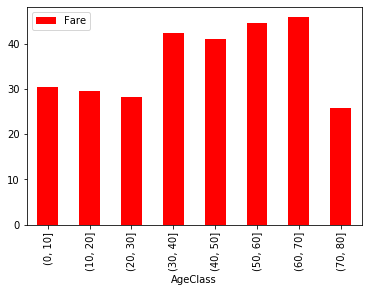

In [32]:
df_titanic.groupby('AgeClass')[['Fare']].mean().plot(kind='bar', color = 'red')